In [1]:
using Gen, Plots, Images, Colors

[ Info: Precompiling Gen [ea4f424c-a589-11e8-07c0-fd5c91b9da4a]


In [199]:
# Global vars

IMG_SIZE = 100;

In [200]:
# See if should be static compiled for inference efficiency
@gen function scene()
    # Defining how many objects are in the scene
    n_objects ~ poisson(3)
    n_objects += 1 # Making sure at least 1 object

    shape_universe = ["square", "circle", "star"]
    color_universe = ["red", "yellow", "green"]

    # Should probably make this a passed in param
    
    objects = []
    for i = 1:n_objects

        shape_idx = {(:shape, i)} ~ uniform_discrete(1,3)
        shape = shape_universe[shape_idx]

        color_idx = {(:color, i)} ~ uniform_discrete(1,3)
        color = color_universe[color_idx]

        x = {(:x, i)} ~ uniform_discrete(1, IMG_SIZE)
        y = {(:y, i)} ~ uniform_discrete(1, IMG_SIZE)
        
        push!(objects, (shape, color, (x, y)))
    end
    
    return objects
end

DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[], false, Union{Nothing, Some{Any}}[], var"##scene#296", Bool[], false)

In [201]:
# Drawing utilities

# colors
color_map = Dict("red" => RGB(1, 0, 0), "yellow" => RGB(1, 1, 0), "green" => RGB(0, 1, 0))

# shapes
function draw_square!(img, center, size, color)
    x, y = center
    half_size = size ÷ 2
    for dx in -half_size:half_size, dy in -half_size:half_size
        nx, ny = x + dx, y + dy
        if 1 <= nx <= IMG_SIZE && 1 <= ny <= IMG_SIZE
            img[ny, nx] = color
        end
    end
end

# Function to draw a circle
function draw_circle!(img, center, radius, color)
    x, y = center
    for dx in -radius:radius, dy in -radius:radius
        if dx^2 + dy^2 <= radius^2
            nx, ny = x + dx, y + dy
            if 1 <= nx <= IMG_SIZE && 1 <= ny <= IMG_SIZE
                img[ny, nx] = color
            end
        end
    end
end

shape_map = Dict("square" => draw_square!, "circle" => draw_circle!, "star" => draw_square!)

Dict{String, Function} with 3 entries:
  "circle" => draw_circle!
  "star"   => draw_square!
  "square" => draw_square!

In [202]:
function render(objects, show_img=false)
    img = fill(RGB(1, 1, 1), IMG_SIZE, IMG_SIZE)
    for (shape, color, center) in objects
        shape_map[shape](img, center, 10, color_map[color])
    end
    if show_img
        display(img)
    end
    return img
    end

render (generic function with 2 methods)

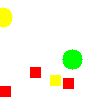

In [212]:
_ = render(get_retval(Gen.simulate(scene, ())), true);

In [ ]:
# TODO (Zack) when write the inference code make sure that we divide the actual 
# overlap by the total potential overlap -- also only take the overlap of the non-white elements